# Decision Tree Results & QAQC

In [17]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../src/')
import image_availability as img
import clean_raw_data as clean

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
df = pd.read_csv("../data/results/decisons_yr0.csv")

In [30]:
df.shape

(12083, 16)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12083 entries, 0 to 12082
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   project        12083 non-null  object 
 1   sitename       12083 non-null  object 
 2   poly_name      12083 non-null  object 
 3   plantstart     12083 non-null  object 
 4   target_sys_og  12083 non-null  object 
 5   practice_og    12083 non-null  object 
 6   area_ha        12083 non-null  float64
 7   baseline_img   12083 non-null  float64
 8   ev_img         12083 non-null  float64
 9   slope_stats    12083 non-null  object 
 10  aspect_stats   12083 non-null  object 
 11  target_sys     12076 non-null  object 
 12  practice       12083 non-null  object 
 13  ttc            12083 non-null  float64
 14  canopy         12083 non-null  object 
 15  method         12083 non-null  object 
dtypes: float64(4), object(12)
memory usage: 1.5+ MB


In [52]:
df.target_sys.unique()

array(['agroforest,silvopasture', 'agroforest', 'wetland',
       'natural-forest', 'plantation', 'silvopasture', 'mangrove',
       'wetland,plantation', 'agroforest,wetland', nan, 'urban-forest'],
      dtype=object)

In [56]:
df[df['target_sys'].isna()]

,project,sitename,poly_name,plantstart,target_sys_og,practice_og,area_ha,baseline_img,ev_img,slope_stats,aspect_stats,target_sys,practice,ttc,canopy,method
8740,wells-for-zoe,Enyezini Forest and Soil Restoration for AFR100,Enyezini,2022-12-17,Null,tree-planting,218.240241,0.0,11.0,"[{'min': 900.0, 'max': 145623.5, 'mean': 29939...","[{'min': 0.0, 'max': 359.11859130859375, 'mean...",NaN,tree-planting,10.0,open,field
9331,blue-forest,South Comoe - Mangrove,MAN-04AP1,2022-09-13,Null,Null,1.269279,0.0,0.0,"[{'min': 0.0, 'max': 23165.16796875, 'mean': 8...","[{'min': 59.0362434387207, 'max': 270.0, 'mean...",NaN,tree-planting,32.0,closed,field
9332,blue-forest,South Comoe - Mangrove,MAN-03AP1,2022-12-27,Null,Null,0.425718,0.0,0.0,"[{'min': 6003.7490234375, 'max': 8538.14941406...","[{'min': 171.86990356445312, 'max': 257.005371...",NaN,tree-planting,67.0,closed,field
9333,blue-forest,South Comoe - Mangrove,MAN-02AP1,2022-12-15,Null,Null,0.050721,0.0,0.0,"[{'min': None, 'max': None, 'mean': None, 'med...","[{'min': None, 'max': None, 'mean': None, 'med...",NaN,tree-planting,26.0,closed,field
9334,blue-forest,South Comoe - Mangrove,MAN-01AP1,2022-07-09,Null,Null,0.010154,0.0,0.0,"[{'min': None, 'max': None, 'mean': None, 'med...","[{'min': None, 'max': None, 'mean': None, 'med...",NaN,tree-planting,79.0,closed,field
9335,blue-forest,South Comoe - Mangrove,MAN-07AP1,2022-12-28,Null,Null,0.304593,0.0,0.0,"[{'min': 2545.58447265625, 'max': 23922.060546...","[{'min': 196.38954162597656, 'max': 315.0, 'me...",NaN,tree-planting,75.0,closed,field
9336,blue-forest,South Comoe - Mangrove,MAN-06AP1,2022-12-28,Null,Null,1.232746,0.0,0.0,"[{'min': 2545.58447265625, 'max': 14650.938476...","[{'min': 15.255118370056152, 'max': 315.0, 'me...",NaN,tree-planting,23.0,closed,field


### What is the tree cover distribution for each target system?

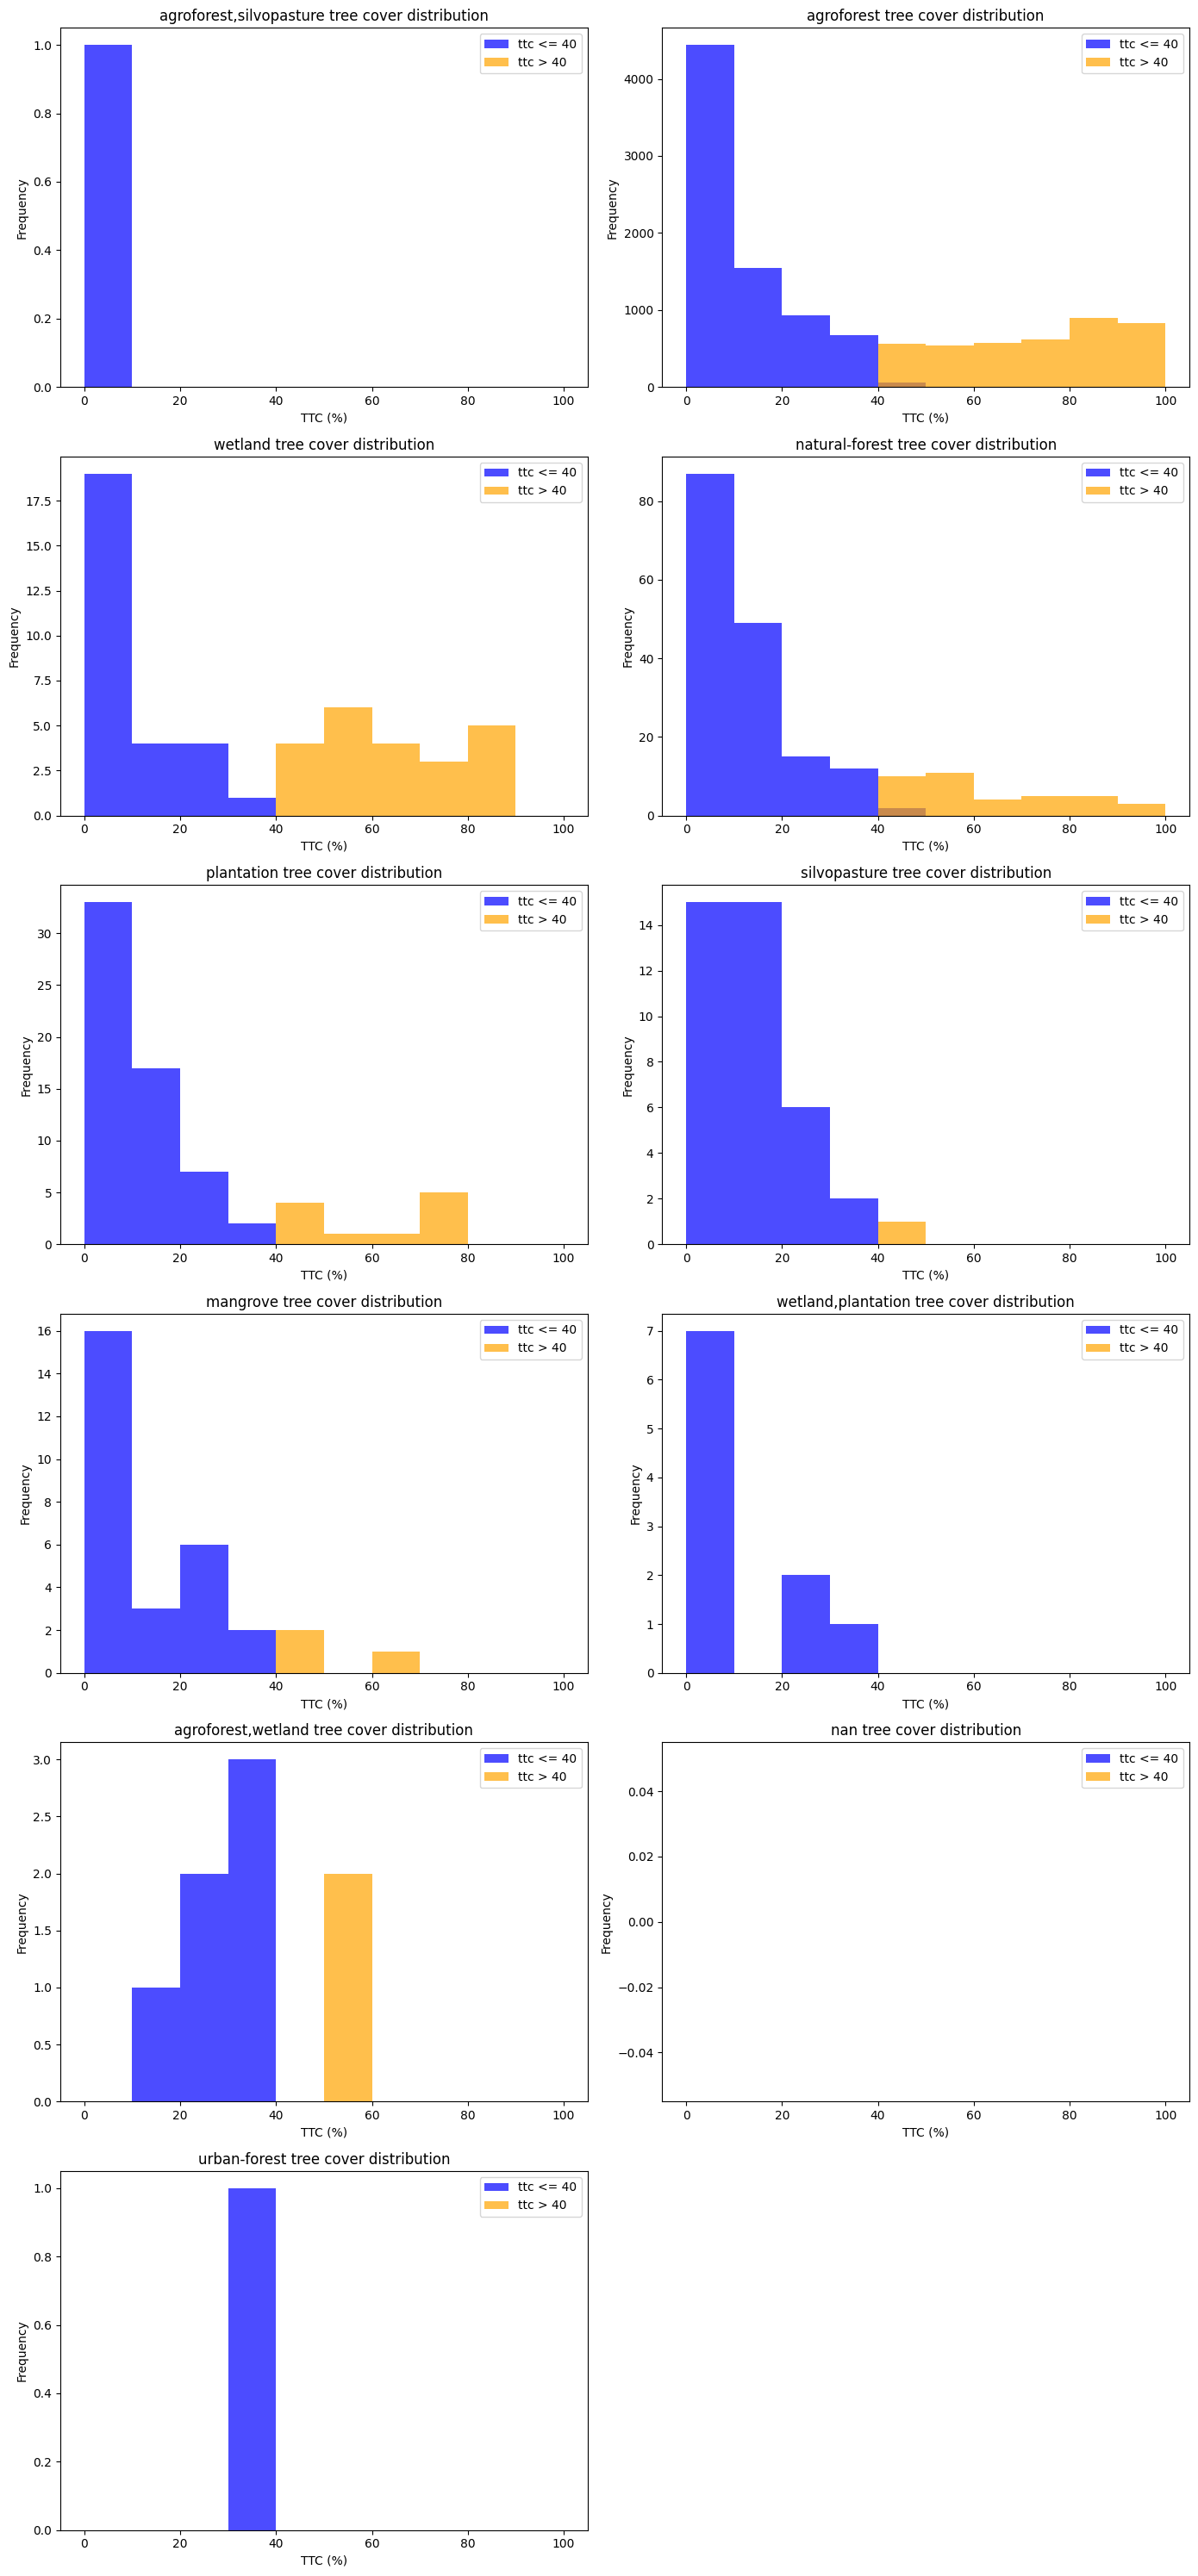

In [36]:
target_sys_list = df['target_sys'].unique()

# Determine the number of rows needed for 2 columns
n_cols = 2
n_rows = int(np.ceil(len(target_sys_list) / n_cols))

# Set up the figure and axes for subplots with 2 columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))

# Flatten axes in case it's a 2D array (needed for easy iteration)
axes = axes.flatten()

# Loop through each target_sys and create a histogram
for i, target_sys in enumerate(target_sys_list):
    ax = axes[i]
    
    # Filter the dataframe for the current target_sys
    df_filtered = df[df['target_sys'] == target_sys]
    
    # Define the bins
    bins = np.linspace(0, 100, 11)  # 10 bins from 0 to 100
    
    # Plot histograms for values < 40 and > 40 in different colors
    df_below_40 = df_filtered[df_filtered['ttc'] <= 40.0]['ttc']
    df_above_40 = df_filtered[df_filtered['ttc'] > 40.0]['ttc']
    
    # Plot values 
    ax.hist(df_below_40, bins=bins, color='blue', label='ttc <= 40', alpha=0.7)
    ax.hist(df_above_40, bins=bins, color='orange', label='ttc > 40', alpha=0.7)
    
    # Add titles and labels
    ax.set_title(f'{target_sys}')
    ax.set_xlabel('tree cover (%)')
    ax.set_ylabel('Frequency')
    
    # Add a legend to differentiate the colors
    ax.legend()

# Remove any extra empty subplots (if the number of target_sys is odd)
for j in range(len(target_sys_list), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for clarity
plt.tight_layout()
plt.show()

### How many projects are closed canopy but don't have enough baseline imgs for remote verification?

### What does the distribution of images look like?

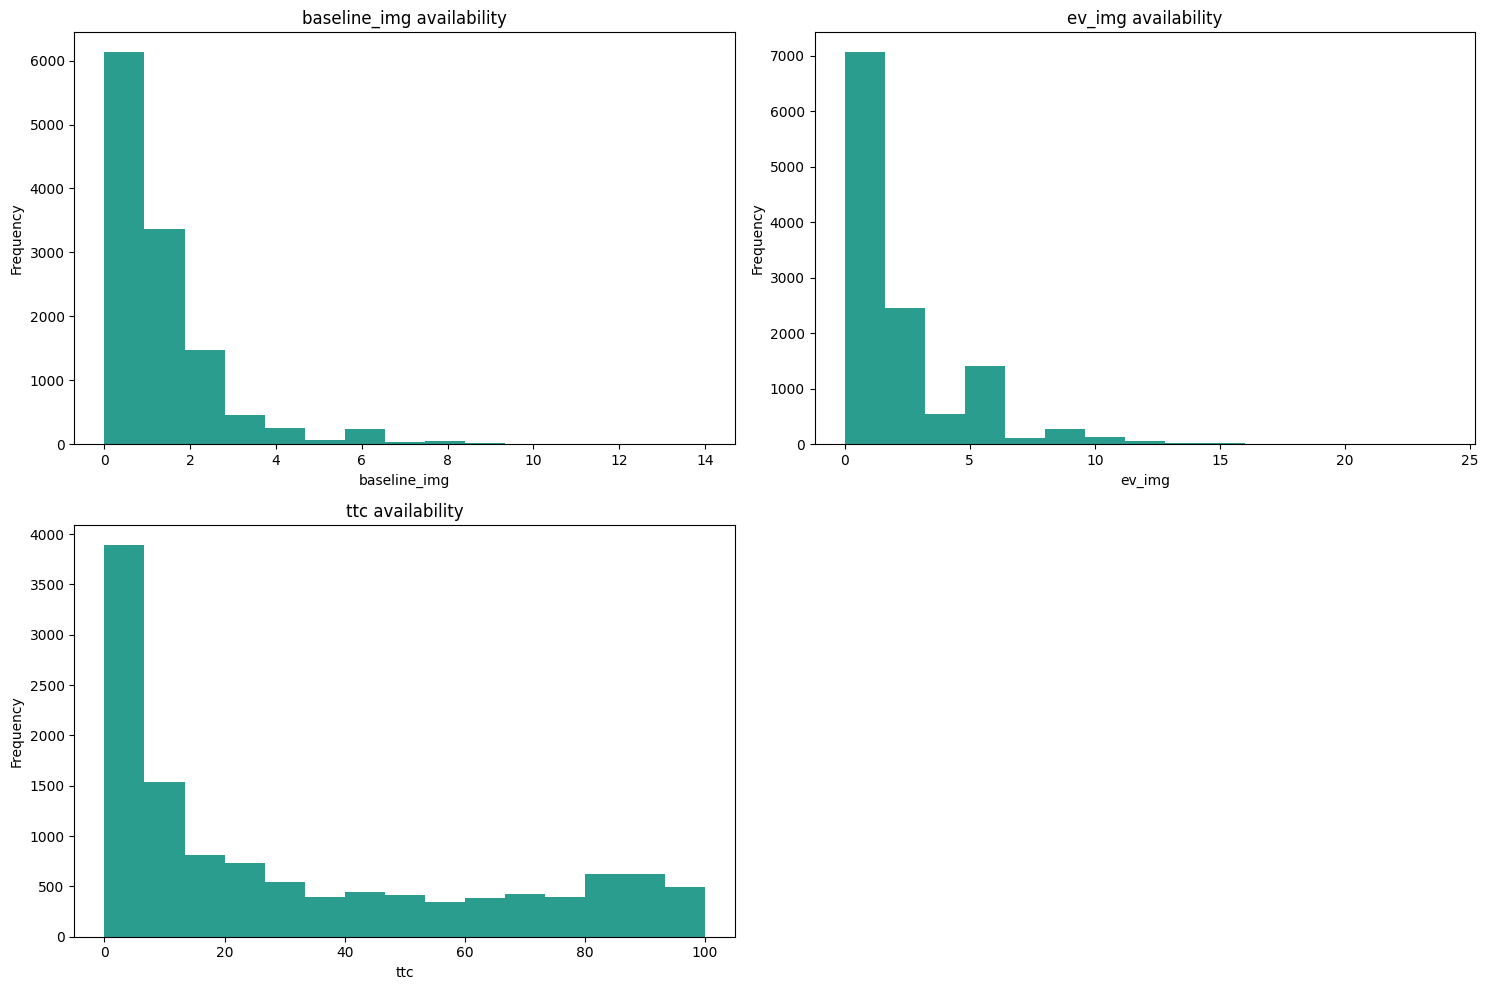

In [62]:
columns = ['baseline_img', 
          'ev_img', 'ttc']
num_plots = len(columns)
fig, axes = plt.subplots(2, (num_plots // 2 + num_plots % 2), figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(columns):
    df[col].plot(kind='hist', bins=15, ax=axes[i], title=f'{col} availability', color='#2a9d8f')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
# Remove any empty subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()

### What does the distribution of target systems and practices look like?

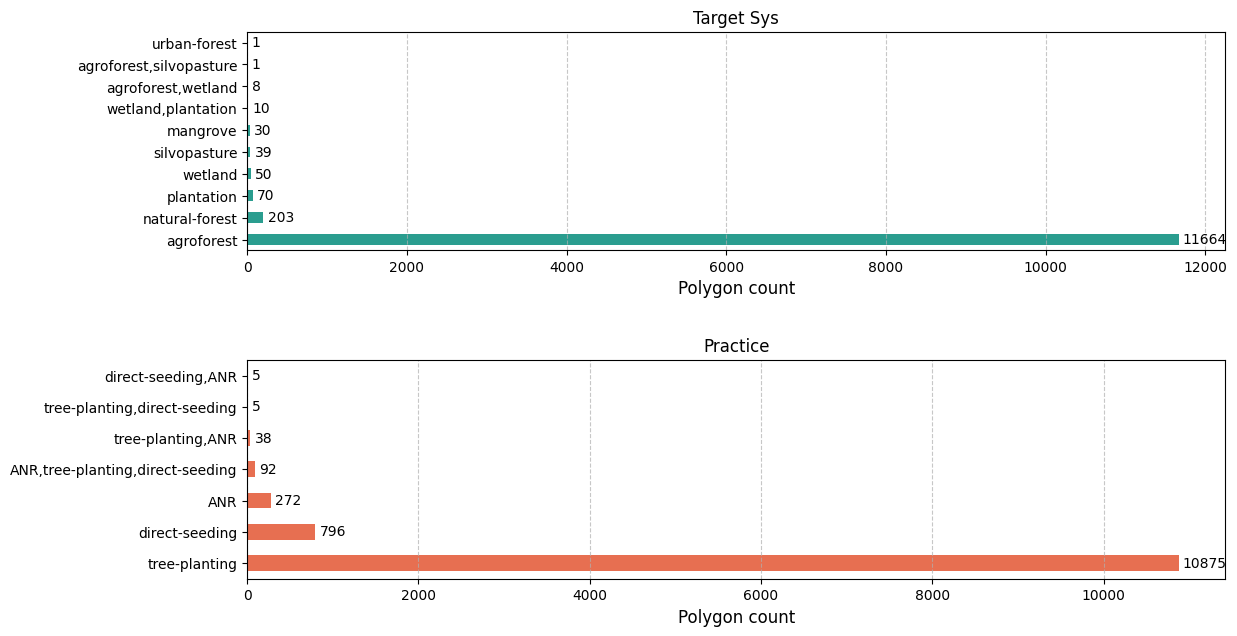

In [57]:
columns = ['target_sys', 'practice']
num_plots = len(columns)
fig, axes = plt.subplots(2, (num_plots // 2 + num_plots % 2), figsize=(13, 7))
axes = axes.flatten()

colors = ['#2a9d8f', '#e76f51', '#f4a261', '#264653']

for i, col in enumerate(columns):
    ax = axes[i]
    value_counts = df[col].value_counts()
    value_counts.plot(kind='barh', ax=ax, title=f'{col.replace("_", " ").title()}', color=colors[i % len(colors)])
    ax.set_xlabel('Polygon count', fontsize=12)
    ax.set_ylabel('')
    
    # Increase font size of ticks
    ax.tick_params(axis='both', which='major', labelsize=10)
    
    # Add gridlines for better readability
    ax.grid(True, axis='x', linestyle='--', alpha=0.7)
    
    # Add bar labels
    for bars in ax.containers:
        ax.bar_label(bars, label_type='edge', padding=3, fontsize=10, color='black')

# Remove any empty subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and spacing
plt.tight_layout(pad=3.0)
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

In [ ]:
method_piechart_perprj(final)